In [2]:
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

In [3]:
img1_path = '1.jpg'
img2_path = '2.jpg'
# read and show images
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
# show by matplotlib
# rotate img1 90 degree
img1 = imutils.rotate(img1, -90)
# show by matplotlib
plt.imshow(img1)
plt.show()


AttributeError: 'NoneType' object has no attribute 'shape'

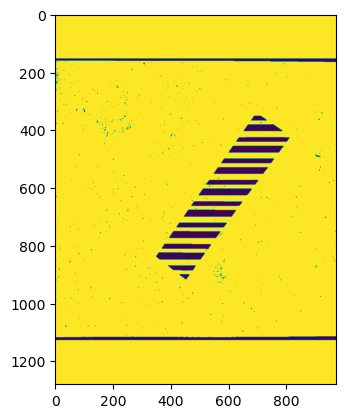

In [155]:
# load the image and convert it to grayscale
image = img1
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# convert to binary image by thresholding it
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV +
                            cv2.THRESH_OTSU)
# show thresholded image
plt.imshow(thresh)
plt.show()

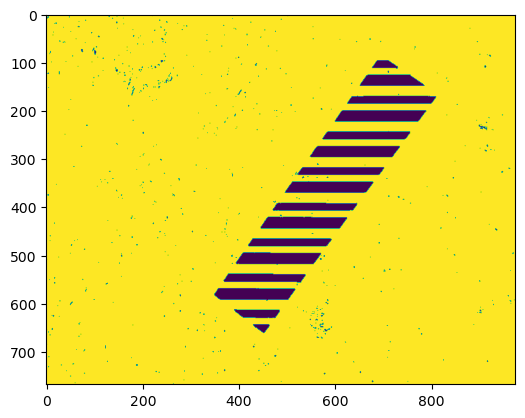

In [156]:
# crop 20% of the image from top and bottom
y = int(image.shape[0] * 0.2)
x = int(image.shape[1] * 0)
crop_img = thresh[y:image.shape[0] - y, x:image.shape[1] - x]
# show cropped image
plt.imshow(crop_img)
plt.show()

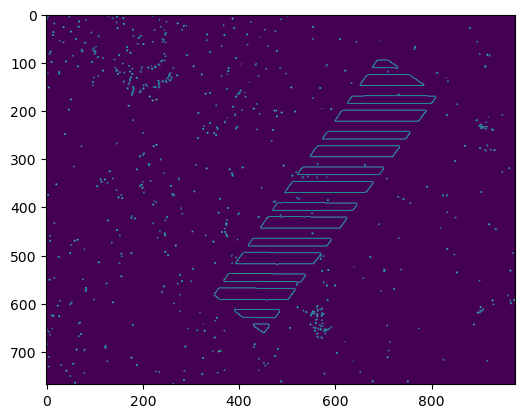

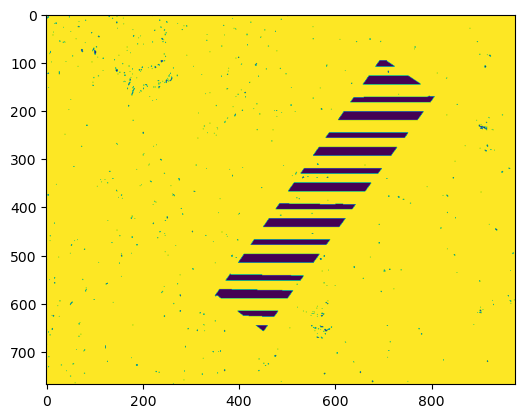

In [157]:
#find edges in the image using canny edge detection method
edges = cv2.Canny(crop_img, 20, 10)
# show result
plt.imshow(edges)
plt.show()
# find lines in the image using hough transform technique
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=100)
# draw lines on the image
for line in lines:
	x1, y1, x2, y2 = line[0]
	cv2.line(crop_img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# show result
plt.imshow(crop_img)
plt.show()


In [169]:
import math

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=70, maxLineGap=100)

for line in lines:
    x1, y1, x2, y2 = line[0]
    theta = math.atan2(y2 - y1, x2 - x1) * 180.0 / math.pi
    print(f"Line: ({x1}, {y1}), ({x2}, {y2}), Angle: {theta}")

Line: (369, 551), (687, 96), Angle: -55.050258261531376
Line: (626, 185), (800, 185), Angle: 0.0
Line: (617, 199), (787, 199), Angle: 0.0
Line: (534, 317), (700, 317), Angle: 0.0
Line: (565, 273), (732, 273), Angle: 0.0
Line: (523, 333), (691, 333), Angle: 0.0
Line: (471, 407), (636, 407), Angle: 0.0
Line: (549, 296), (719, 296), Angle: 0.0
Line: (386, 518), (555, 518), Angle: 0.0
Line: (586, 243), (754, 243), Angle: 0.0
Line: (420, 481), (582, 481), Angle: 0.0
Line: (600, 222), (773, 222), Angle: 0.0
Line: (574, 259), (745, 259), Angle: 0.0
Line: (361, 592), (585, 592), Angle: 0.0
Line: (512, 347), (677, 347), Angle: 0.0
Line: (446, 444), (610, 444), Angle: 0.0
Line: (498, 370), (661, 370), Angle: 0.0
Line: (430, 465), (589, 465), Angle: 0.0
Line: (281, 555), (576, 555), Angle: 0.0
Line: (652, 148), (783, 148), Angle: 0.0
Line: (660, 169), (792, 169), Angle: 0.0
Line: (431, 691), (755, 244), Angle: -54.064189908125144
Line: (409, 495), (569, 495), Angle: 0.0
Line: (393, 568), (517, 57

In [183]:
# get 2 most frequent angle with variation of 10 degrees
most_dict = {}
for line in lines:
    x1, y1, x2, y2 = line[0]
    theta = int(math.atan2(y2 - y1, x2 - x1) * 180.0 / math.pi)
    if theta == 0:
        continue
    if len(list(most_dict.keys())) == 0:
        most_dict[theta] = 1
    for k in list(most_dict.keys()):
            if abs(theta - k) < 10:
                most_dict[k] += 1
            if abs(theta - k) > 10:
                most_dict[theta] = 1
most_dict = sorted(most_dict.items(), key=lambda x: x[1], reverse=True)[:2]
most_dict
# get 1st angle
theta1 = most_dict[0][0]
theta1


-55

In [185]:
if theta1 > 0:
    src_pts = []
else:
    _theta1 = abs(theta1)
    _theta1 = _theta1 * math.pi / 180
    src_pts = np.float32([[10+int(10/math.tan(_theta1)), 10], [50+int(10/math.tan(_theta1)), 10], [10, 20], [50, 20]])
dst_pts = np.float32([[10, 10], [50, 10], [10, 20], [50, 20]])
src_pts

array([[17., 10.],
       [57., 10.],
       [10., 20.],
       [50., 20.]], dtype=float32)

True

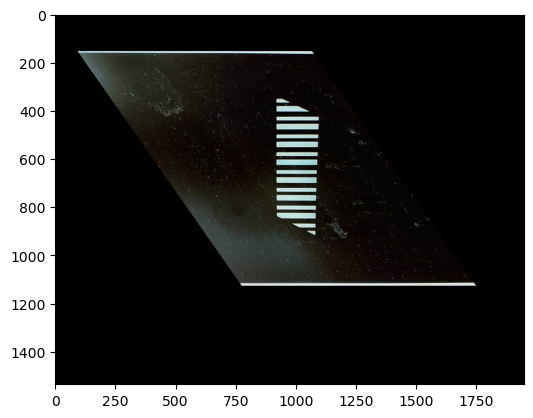

In [187]:
# Get the transformation matrix
matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
# Apply the transformation
warped_img = cv2.warpPerspective(image, matrix, (crop_img.shape[1]*2, crop_img.shape[0]*2))
# show result

plt.imshow(warped_img)
# Save the output
cv2.imwrite('output.jpg', warped_img)